In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
sim = HathorSimulator(block_weight=20.30)

m0 = Miner(hashpower=10000)
sim.add_miner(m0)

g1 = TxGenerator(tx_lambda=1./(30*60), hashpower=10000)
sim.add_tx_generator(g1)

In [13]:
sim.run(3600*24*30, report_interval=3600*24)
print(len(sim.blocks), len(sim.transactions))

  0.02 [  5270849.08] blocks=41102 txs=2925 tips=1
  0.04 [  5357290.68] blocks=41759 txs=2969 tips=1
  0.06 [  5443842.67] blocks=42496 txs=3014 tips=1
  0.13 [  5530321.26] blocks=43224 txs=3076 tips=1
  0.15 [  5616824.35] blocks=43900 txs=3121 tips=1
  0.17 [  5703246.92] blocks=44565 txs=3171 tips=1
  0.19 [  5789932.90] blocks=45204 txs=3207 tips=1
  0.21 [  5876510.48] blocks=45852 txs=3255 tips=1
  0.23 [  5963062.89] blocks=46519 txs=3306 tips=1
  0.25 [  6049687.34] blocks=47192 txs=3356 tips=1
  0.27 [  6136126.98] blocks=47852 txs=3406 tips=1
  0.29 [  6222562.98] blocks=48531 txs=3469 tips=1
  0.31 [  6309163.07] blocks=49268 txs=3525 tips=1
  0.33 [  6395656.50] blocks=49954 txs=3562 tips=1
  0.36 [  6482329.80] blocks=50634 txs=3621 tips=1
  0.37 [  6568796.66] blocks=51267 txs=3676 tips=1
  0.40 [  6655288.20] blocks=51922 txs=3731 tips=1
  0.42 [  6741694.24] blocks=52632 txs=3779 tips=1
  0.44 [  6828341.19] blocks=53289 txs=3827 tips=1
  0.46 [  6915036.10] blocks=53

In [14]:
print(sim.min_weight_confirmed)

22.8532671089


In [15]:
nodes = sim.transactions + sim.blocks
nodes.sort(key=lambda x: x.time)

In [16]:
v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]

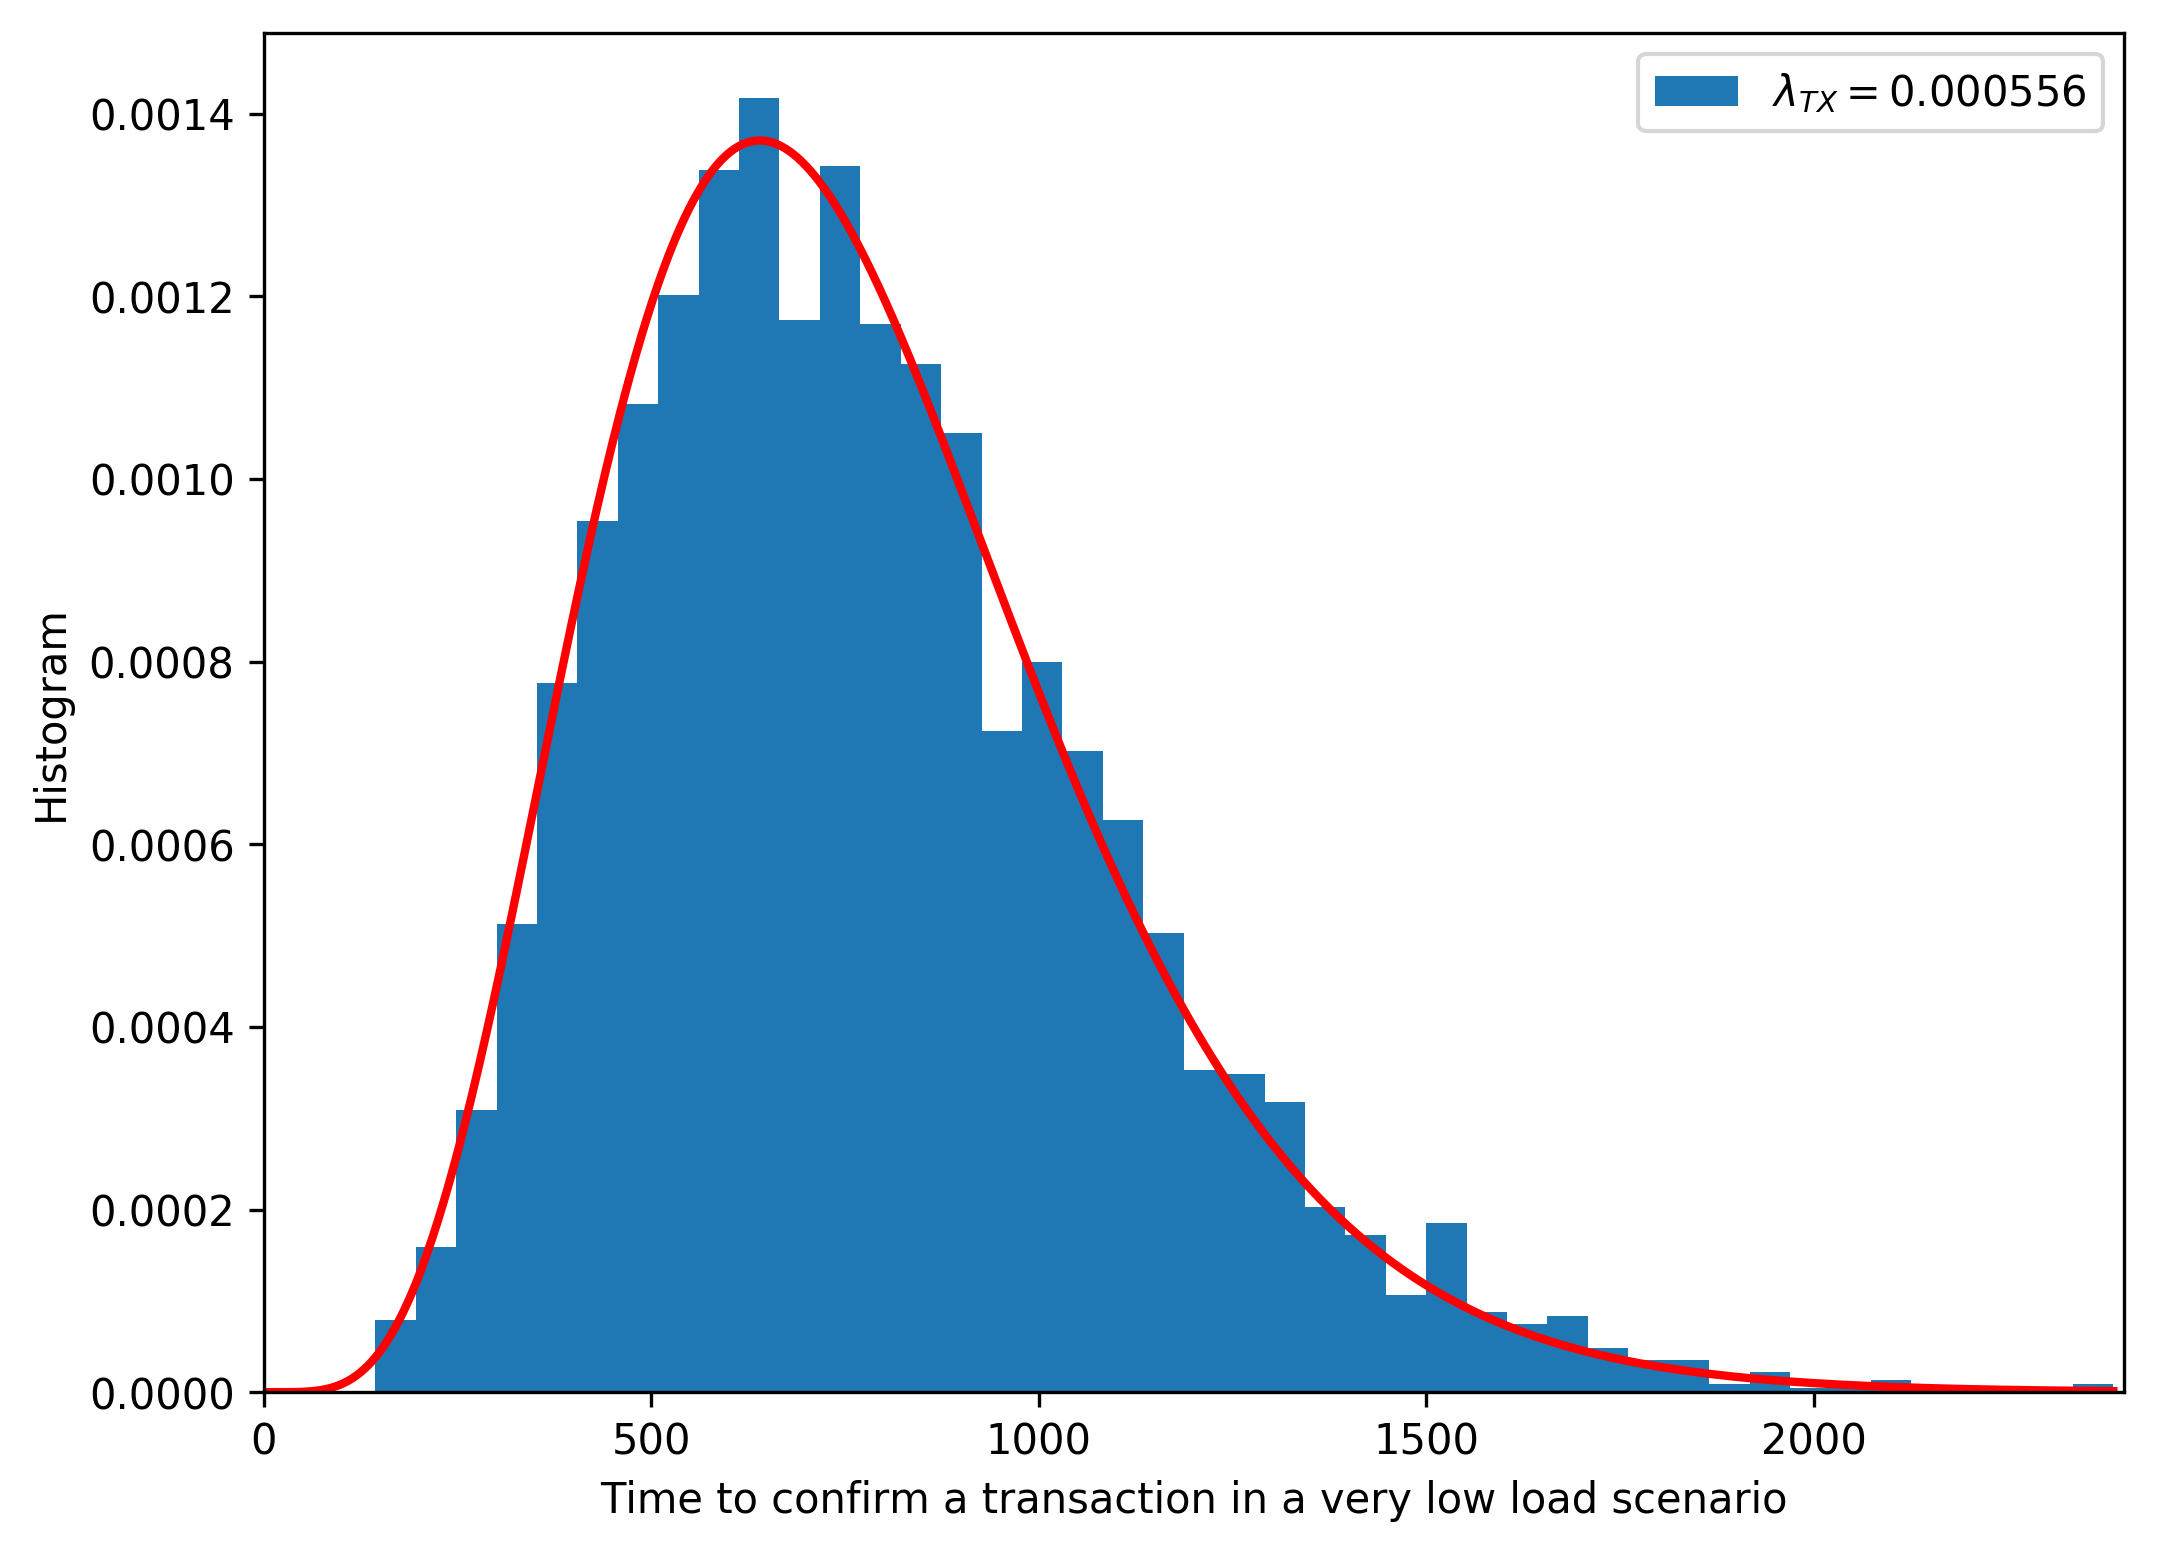

In [17]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v, bins='fd', density=True, label='$\lambda_{{TX}} = {:.6f}$'.format(sim.tx_generators[0].tx_lambda));

x = np.linspace(0, max(v), 1000)
y = scipy.stats.erlang.pdf(x, 6, 0, 128)
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction in a very low load scenario');
plt.xlim(0, 2400)
plt.legend();

In [ ]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)